In [1]:
import ROOT
from array import array
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.20/06


In [2]:
ROOT.gStyle.SetOptStat(0)

def get_graph(file_path):

    r_obs = array('d',[])
    nll_obs = array('d',[])
    zeros = array('d',[])

    #rootfile = "higgsCombineTest.MultiDimFit.mH120.root"
    rootfile = file_path

    f_obs = ROOT.TFile(rootfile,"READ")
    t_obs = f_obs.Get("limit")
    for i in range(1,t_obs.GetEntries()):
        t_obs.GetEntry(i)
        r_obs.append(t_obs.r)
        nll_obs.append(2.0*t_obs.deltaNLL)
        zeros.append(0.0)

    """
    v_r_obs = ROOT.TVectorD(len(r_obs),r_obs)
    v_nll_obs = ROOT.TVectorD(len(nll_obs),nll_obs)
    v_zeros = ROOT.TVectorD(len(zeros),zeros)

    gr_obs = ROOT.TGraphAsymmErrors(v_r_obs,v_nll_obs,v_zeros,v_zeros,v_zeros,v_zeros)

    return gr_obs, r_obs
    """
    
    return np.array(r_obs), np.array(nll_obs)

## Shift

In [3]:
nll_bce = []
nll_inferno_analytical = []
nll_inferno_approx = []
for i in range(10):
    
    file_path = "/eos/user/l/llayer/cmsopen/columnar/note_v0/combine/inferno_systematic7/Fit/bce_norm_" + str(i) + \
                 "/fit/syst/higgsCombineTest.MultiDimFit.mH120.root"
    nll_bce.append( get_graph(file_path) )
    file_path = "/eos/user/l/llayer/cmsopen/columnar/note_v0/combine/inferno_systematic7/Fit/inferno_norm_analytical_" + str(i) + \
                 "/fit/syst/higgsCombineTest.MultiDimFit.mH120.root"
    nll_inferno_analytical.append( get_graph(file_path) )
    file_path = "/eos/user/l/llayer/cmsopen/columnar/note_v0/combine/inferno_systematic7/Fit/inferno_norm_approx_" + str(i) + \
                 "/fit/syst/higgsCombineTest.MultiDimFit.mH120.root"
    nll_inferno_approx.append( get_graph(file_path) )

Text(0.5, 1.0, 'Binary Cross-Entropy')

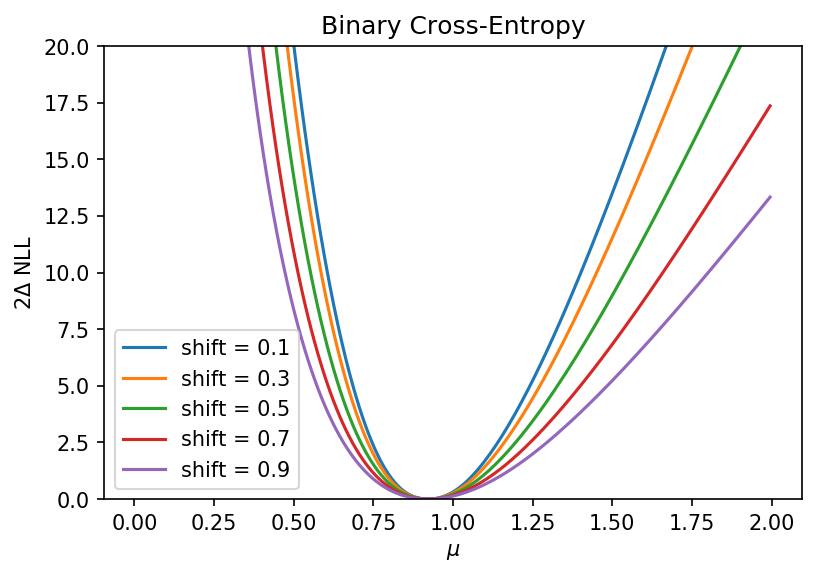

In [4]:
plt.figure(dpi=150)
shift = np.linspace(0.1,1,10)
for i in [0,2,4,6,8]:
    plt.plot(nll_bce[i][0], nll_bce[i][1] - min(nll_bce[i][1]), label="shift = " + str(round(shift[i],1)))
    plt.ylim(0,20)
plt.legend(loc="lower left")
plt.ylabel(r'$2\Delta$ NLL')
plt.xlabel(r'$\mu$')
plt.title("Binary Cross-Entropy")

Text(0.5, 1.0, 'INFERNO analytical')

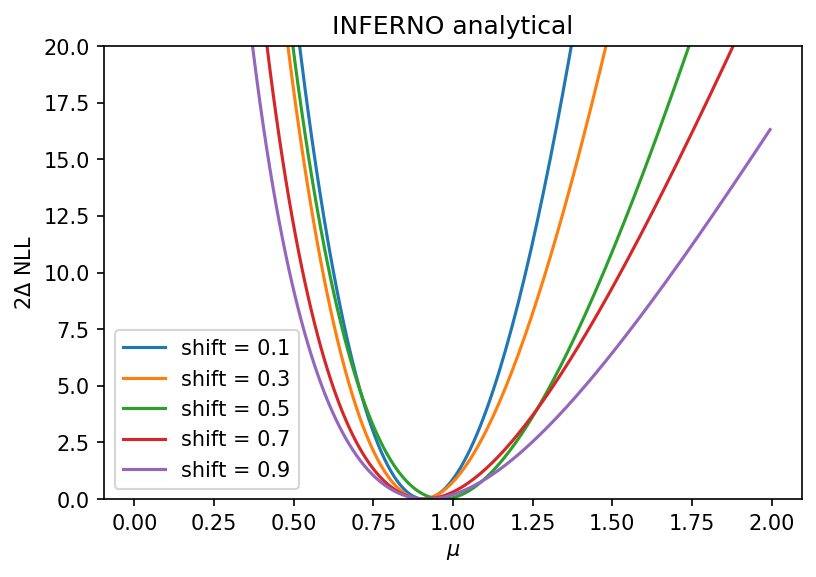

In [5]:
plt.figure(dpi=150)
shift = np.linspace(0.1,1,10)
for i in [0,2,4,6,8]:
    plt.plot(nll_inferno_analytical[i][0], nll_inferno_analytical[i][1] - min(nll_inferno_analytical[i][1]), 
             label="shift = " + str(round(shift[i],1)))
    plt.ylim(0,20)
plt.legend(loc="lower left")
plt.ylabel(r'$2\Delta$ NLL')
plt.xlabel(r'$\mu$')
plt.title("INFERNO analytical")

Text(0.5, 1.0, 'INFERNO approx')

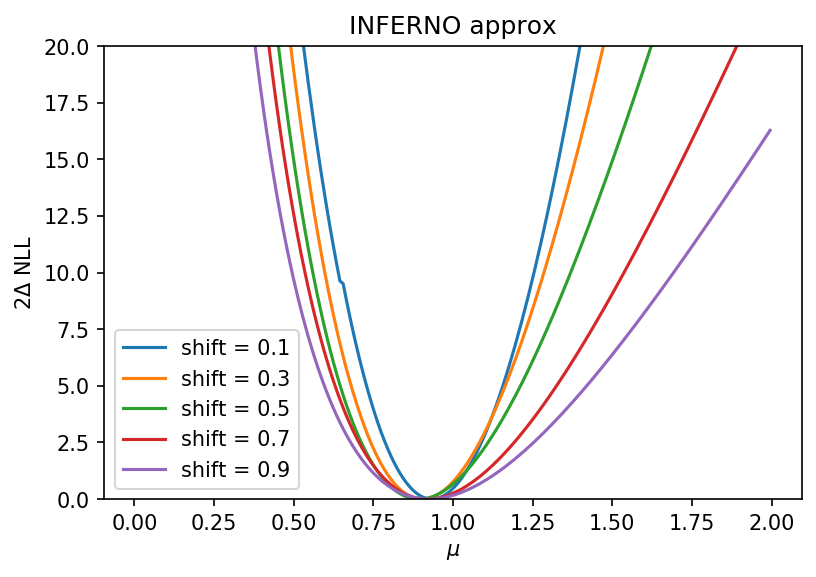

In [6]:
plt.figure(dpi=150)
shift = np.linspace(0.1,1,10)
for i in [0,2,4,6,8]:
    plt.plot(nll_inferno_approx[i][0], nll_inferno_approx[i][1] - min(nll_inferno_approx[i][1]), 
             label="shift = " + str(round(shift[i],1)))
    plt.ylim(0,20)
plt.legend(loc="lower left")
plt.ylabel(r'$2\Delta$ NLL')
plt.xlabel(r'$\mu$')
plt.title("INFERNO approx")

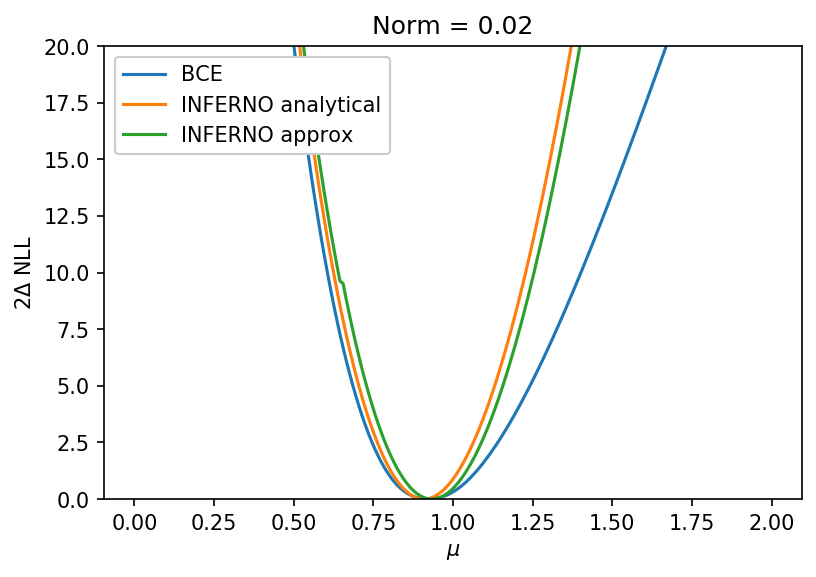

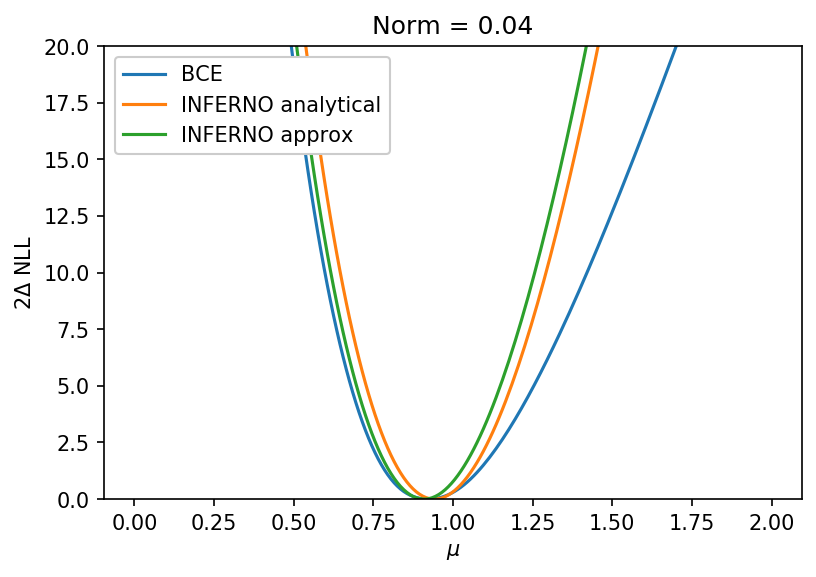

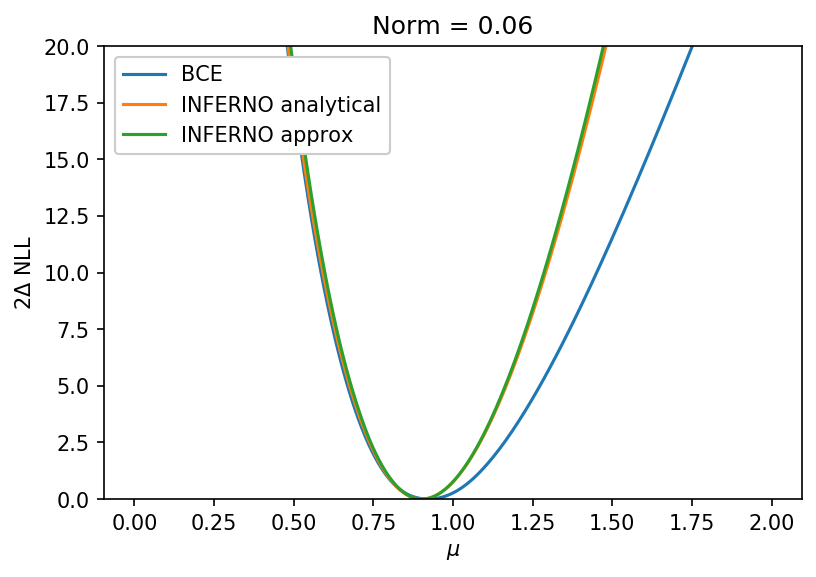

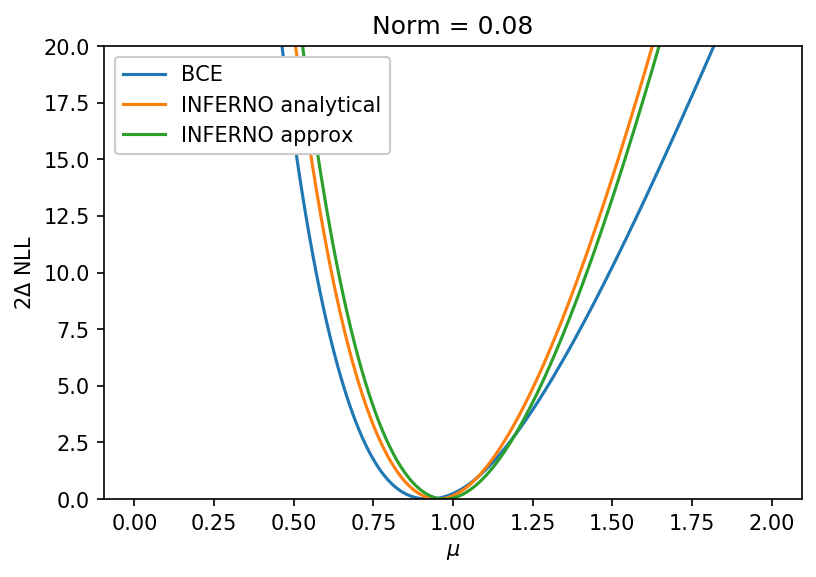

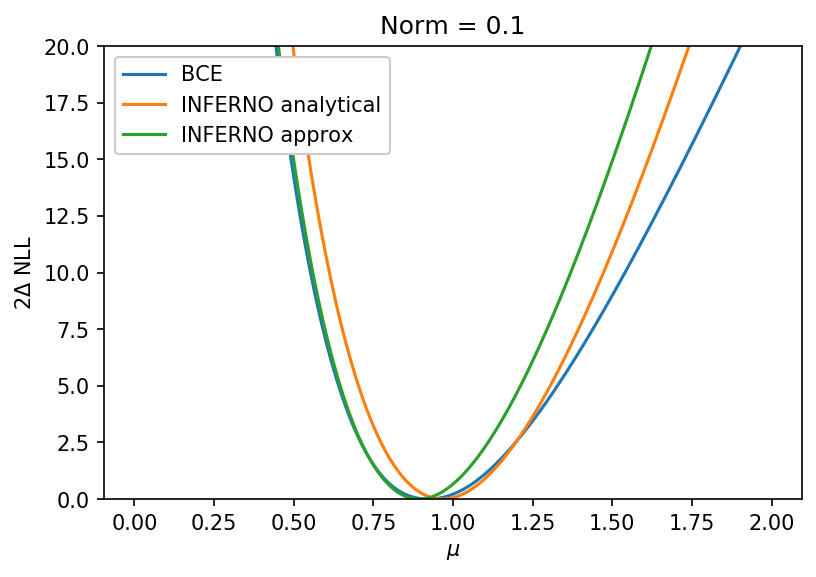

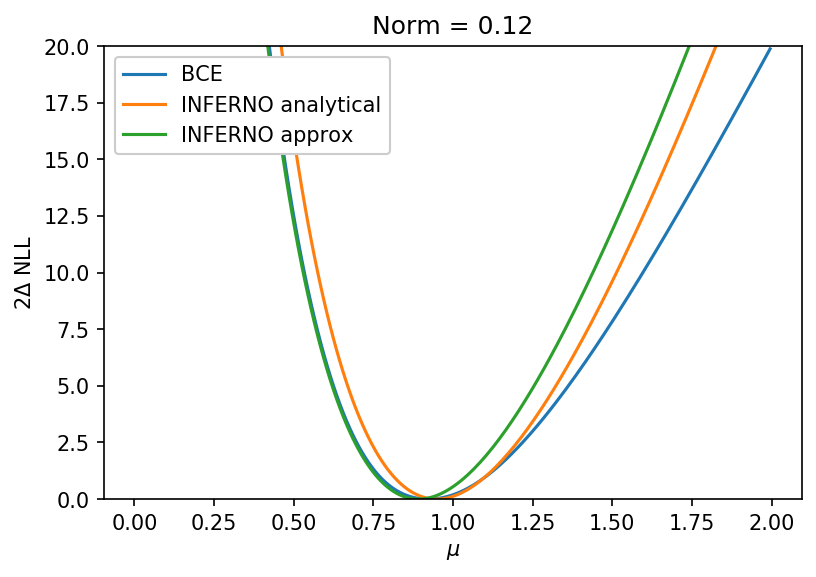

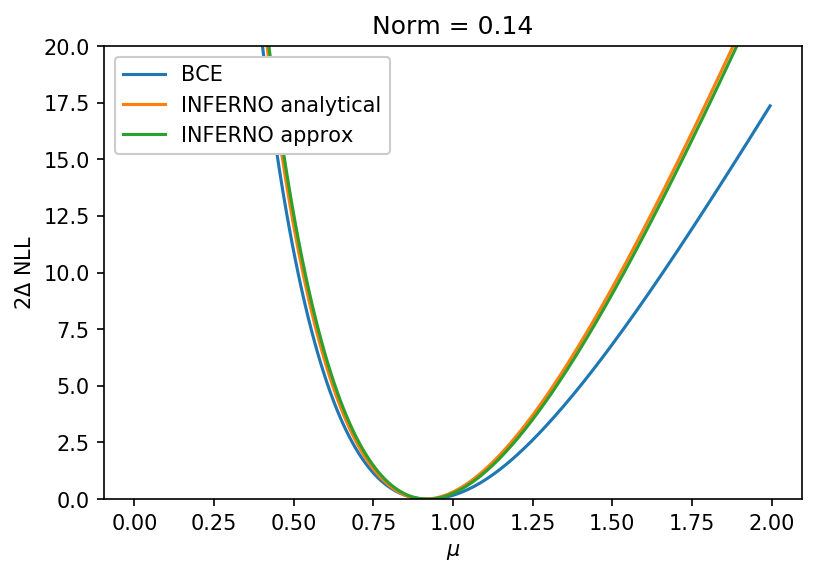

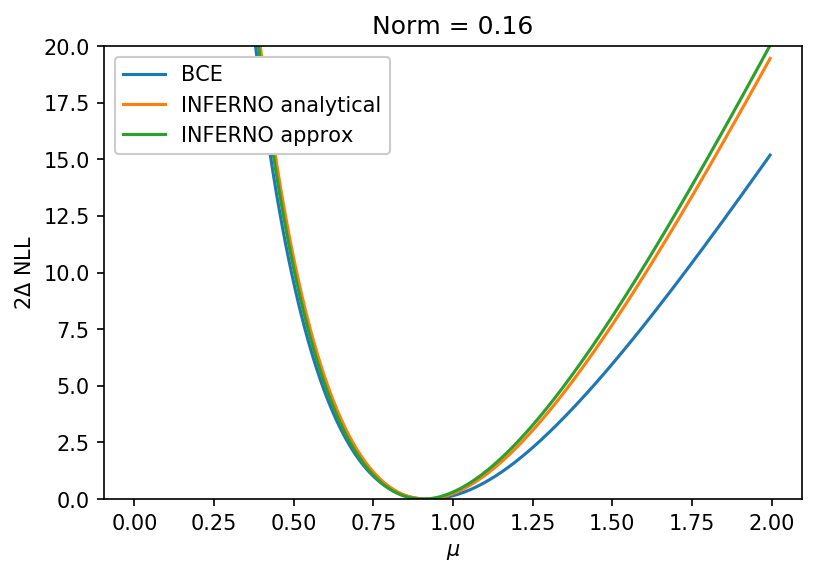

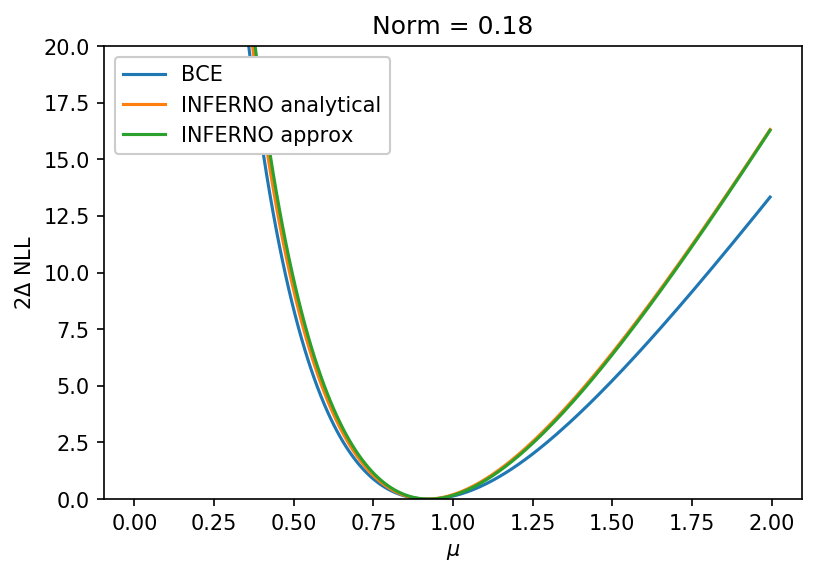

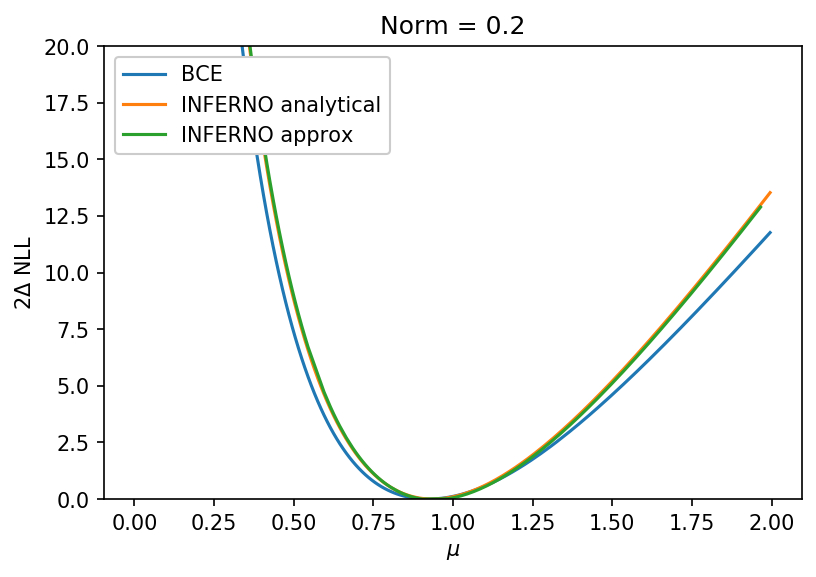

In [9]:
norms = np.linspace(0.02,0.2,10)
for i, norm in enumerate(norms):
    plt.figure(dpi=150)
    plt.plot(nll_bce[i][0], nll_bce[i][1] - min(nll_bce[i][1]), label="BCE")
    plt.plot(nll_inferno_analytical[i][0], nll_inferno_analytical[i][1] - min(nll_inferno_analytical[i][1]), 
             label = "INFERNO analytical")
    plt.plot(nll_inferno_approx[i][0], nll_inferno_approx[i][1] - min(nll_inferno_approx[i][1]), 
             label = "INFERNO approx")
    plt.ylim(0,20)
    plt.legend(loc="upper left", framealpha=1.)
    plt.ylabel(r'$2\Delta$ NLL')
    plt.xlabel(r'$\mu$')
    plt.title("Norm = " + str(round(norm,2)))
    #plt.title("#NP = " + str(i+1))
    plt.show()

## Nuis

In [18]:
nll_bce = []
nll_inferno_analytical = []
nll_inferno_approx = []
for i in range(1,5):
    
    file_path = "/eos/user/l/llayer/cmsopen/columnar/note_v0/combine/inferno_systematic5/Fit/bce_nuis_" + str(i) + \
                 "/fit/syst/higgsCombineTest.MultiDimFit.mH120.root"
    nll_bce.append( get_graph(file_path) )
    file_path = "/eos/user/l/llayer/cmsopen/columnar/note_v0/combine/inferno_systematic5/Fit/inferno_nuis_analytical_" + str(i) + \
                 "/fit/syst/higgsCombineTest.MultiDimFit.mH120.root"
    nll_inferno_analytical.append( get_graph(file_path) )
    file_path = "/eos/user/l/llayer/cmsopen/columnar/note_v0/combine/inferno_systematic5/Fit/inferno_nuis_approx_" + str(i) + \
                 "/fit/syst/higgsCombineTest.MultiDimFit.mH120.root"
    nll_inferno_approx.append( get_graph(file_path) )

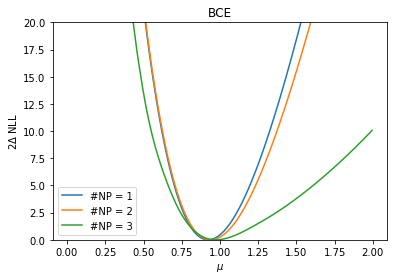

In [19]:
for i in range(3):
    plt.plot(nll_bce[i][0], nll_bce[i][1] - min(nll_bce[i][1]), label = "#NP = " + str(i+1))
    plt.ylim(0,20)
    plt.legend(loc="lower left")
    plt.ylabel(r'$2\Delta$ NLL')
    plt.xlabel(r'$\mu$')
    plt.title("BCE")

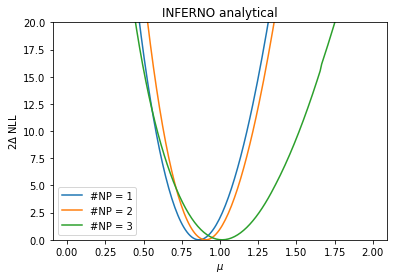

In [20]:
for i in range(3):
    plt.plot(nll_inferno_analytical[i][0], nll_inferno_analytical[i][1] - min(nll_inferno_analytical[i][1]), 
             label = "#NP = " + str(i+1))
    plt.ylim(0,20)
    plt.legend(loc="lower left")
    plt.ylabel(r'$2\Delta$ NLL')
    plt.xlabel(r'$\mu$')
    plt.title("INFERNO analytical")

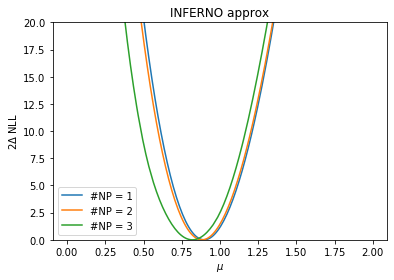

In [21]:
for i in range(3):
    plt.plot(nll_inferno_approx[i][0], nll_inferno_approx[i][1] - min(nll_inferno_approx[i][1]), 
             label = "#NP = " + str(i+1))
    plt.ylim(0,20)
    plt.legend(loc="lower left")
    plt.ylabel(r'$2\Delta$ NLL')
    plt.xlabel(r'$\mu$')
    plt.title("INFERNO approx")

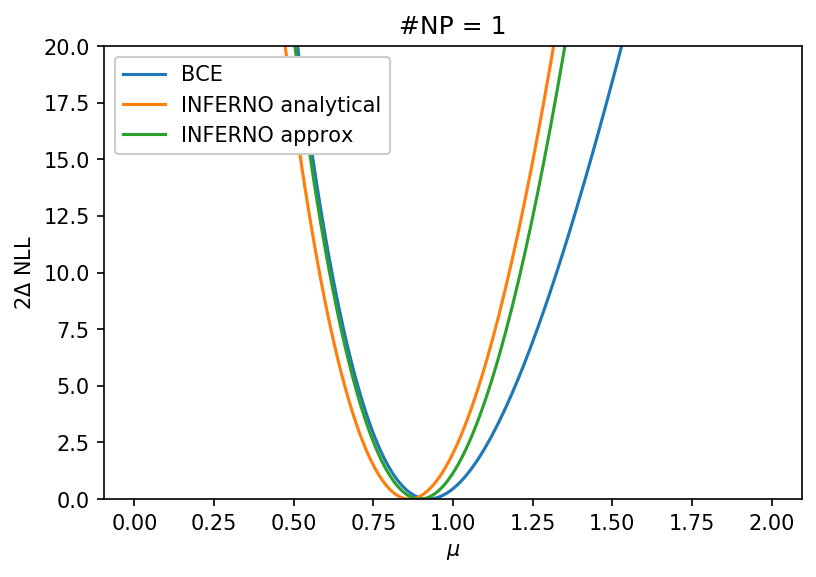

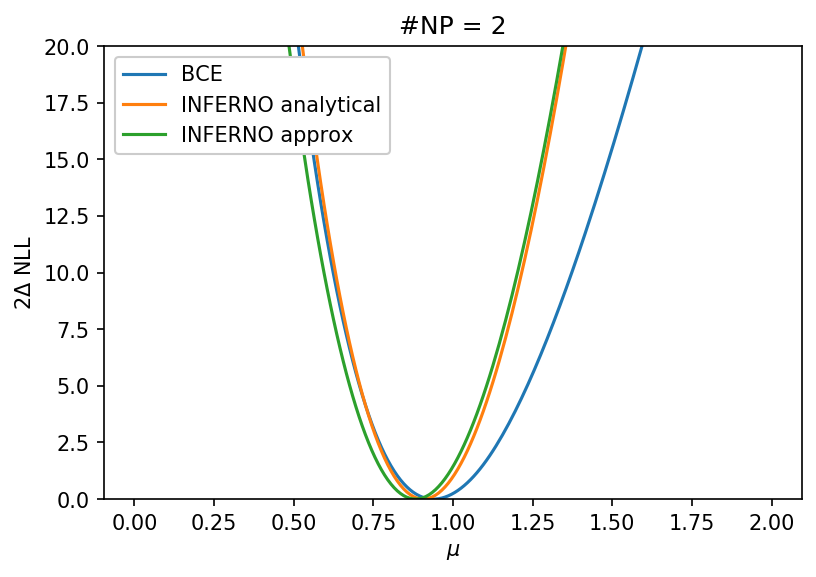

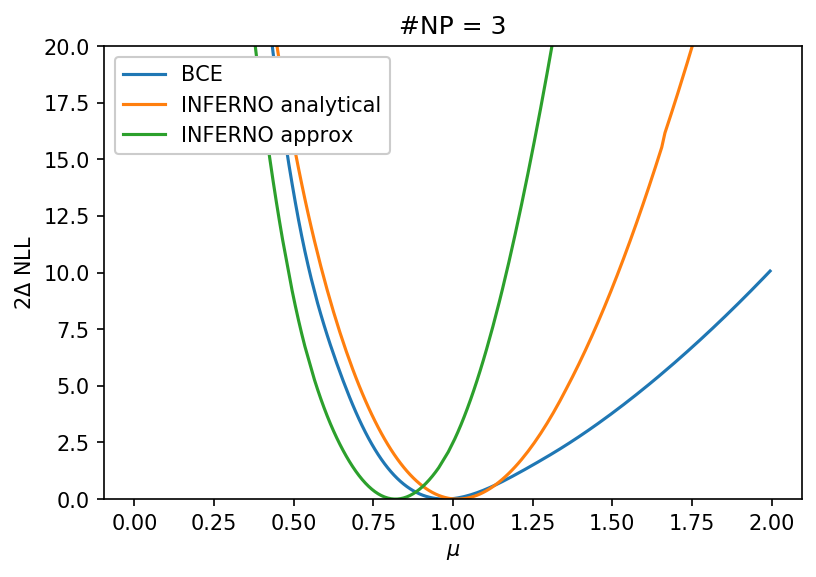

In [27]:
for i in range(3):
    plt.figure(dpi=150)
    plt.plot(nll_bce[i][0], nll_bce[i][1] - min(nll_bce[i][1]), label="BCE")
    plt.plot(nll_inferno_analytical[i][0], nll_inferno_analytical[i][1] - min(nll_inferno_analytical[0][1]), 
             label = "INFERNO analytical")
    plt.plot(nll_inferno_approx[i][0], nll_inferno_approx[i][1] - min(nll_inferno_approx[0][1]), 
             label = "INFERNO approx")
    plt.ylim(0,20)
    plt.legend(loc="upper left", framealpha=1.)
    plt.ylabel(r'$2\Delta$ NLL')
    plt.xlabel(r'$\mu$')
    plt.title("#NP = " + str(i+1))
    plt.show()

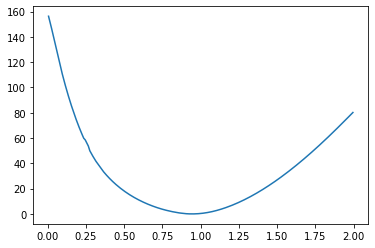

In [23]:
plt.plot(nll_inferno_approx[3][0], nll_inferno_approx[3][1] - min(nll_inferno_approx[3][1]))

## Sys 6